In [1]:
import numpy as np
import pandas as pd
import queue
import matplotlib.pyplot as plt

from Backtest.backtest import Backtest
from Backtest.data import OHLCDataHandler
from CCIStrategy import CCIStrategy
from Backtest.open_json_gz_files import open_json_gz_files
from Backtest.generate_bars import generate_bars

In [2]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
import hyperopt.pyll.stochastic

In [3]:
def run_backtest(config, trading_data, ohlc_data, window):
    window = int(window)
    config['title'] = "CCIStrategy" + "_" + str(window)
    print("---------------------------------")
    print(config['title'])
    print("---------------------------------")
    
    events_queue = queue.Queue()

    data_handler = OHLCDataHandler(
        config, events_queue,
        trading_data = trading_data, ohlc_data = ohlc_data
    )
    strategy = CCIStrategy(config, events_queue, data_handler,window = window)

    backtest = Backtest(config, events_queue, strategy,
                        data_handler= data_handler)

    results = backtest.start_trading()
    
    # dict_ans = {
    #     "short_window": [short_window],
    #     "long_window": [long_window],
    #     "Sharpe Ratio": [results['sharpe']],
    #     "Total Returns": [(results['cum_returns'][-1] - 1)],
    #     "Max Drawdown": [(results["max_drawdown"] * 100.0)],
    #     "Max Drawdown Duration": [(results['max_drawdown_duration'])],
    #     "Trades": [results['trade_info']['trading_num']],
    #     "Trade Winning": [results['trade_info']['win_pct']],
    #     "Average Trade": [results['trade_info']['avg_trd_pct']],
    #     "Average Win": [results['trade_info']['avg_win_pct']],
    #     "Average Loss": [results['trade_info']['avg_loss_pct']],
    #     "Best Trade": [results['trade_info']['max_win_pct']],
    #     "Worst Trade": [results['trade_info']['max_loss_pct']],
    #     "Worst Trade Date": [results['trade_info']['max_loss_dt']],
    #     "Avg Days in Trade": [results['trade_info']['avg_dit']]
    # }
    # return pd.DataFrame(dict_ans)
    return -1 * (results['cum_returns'][-1] - 1)

In [4]:
def f(params):
    config = {
        "csv_dir": "./Binance",
        "out_dir": "./results/CCIStrategy",
        "title": "AOStrategy",
        "is_plot": False,
        "save_plot": False,
        "save_tradelog": False,
        "start_date": pd.Timestamp("2017-07-01T00:0:00", freq = "60" + "T"),    # str(freq) + "T"
        "end_date": pd.Timestamp("2018-04-01T00:00:00", freq = "60" + "T"),
        "equity": 1.0,
        "freq": 60,      # min
        "commission_ratio": 0.001,
        "suggested_quantity": None,     # None or a value
        "max_quantity": None,           # None or a value, Maximum purchase quantity
        "min_quantity": None,           # None or a value, Minimum purchase quantity
        "min_handheld_cash": None,      # None or a value, Minimum handheld funds
        "exchange": "Binance",
        "tickers": ['BTCUSDT']
    }
    # trading_data = {}
    # for ticker in config['tickers']:
    #     # trading_data[ticker] = open_gz_files(config['csv_dir'], ticker)
    #     trading_data[ticker] = pd.read_hdf(config['csv_dir'] + '\\' + ticker + '.h5', key=ticker)

    ohlc_data = {}
    for ticker in config['tickers']:
        # ohlc_data[ticker] = generate_bars(trading_data, ticker, config['freq'])
        ohlc_data[ticker] = pd.read_hdf(config['csv_dir'] + '\\' + ticker + '_OHLC_60min.h5', key=ticker)

    trading_data = None
    
    window = params['window']
    val = run_backtest(config, trading_data, ohlc_data, window)
    return {'loss': val, 'status': STATUS_OK}

In [5]:
space = {
    'window': hp.randint('window', 120),
}

In [13]:
# print(hyperopt.pyll.stochastic.sample(space))

In [6]:
trials = Trials()

In [7]:
best = fmin(fn=f, space=space, algo=tpe.suggest, max_evals=100, trials=trials)

---------------------------------
CCIStrategy_33
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.6815576843
Sortino Ratio: 3.1830308465
Information Ratio: 0.4572813221
Max Drawdown: 0.4446206987
Max Drawdown Duration: 250900
Total Returns: 0.6289420888
Annualized Returns: 1.4802613374
Compound Annual Growth Rate: 2.1530835429
---------------------------------
Trades: 42
Trade Winning: 40.48%
Average Trade: 1.90%
Average Win: 11.36%
Average Loss: -4.52%
Best Trade: 47.23%
Worst Trade: -13.33%
Worst Trade Date: 0 days 04:00:00
Avg Days in Trade: 1 days 22:44:17
---------------------------------
---------------------------------
CCIStrategy_76
---------------------------------
Data Time Interval for BTCUSDT:
	Start Dat

D:\Dev\test\backtest\CCIStrategy.py:56: RuntimeWarning: invalid value encountered in double_scalars
  cci = (tp_current - tp_ma) / (0.015 * md)


---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: -3.9583140033
Sortino Ratio: -5.9992451259
Information Ratio: -5.2388048017
Max Drawdown: 0.8608650757
Max Drawdown Duration: 273500
Total Returns: -0.8079938030
Annualized Returns: -1.9016726797
Compound Annual Growth Rate: -0.9794302097
---------------------------------
Trades: 245
Trade Winning: 35.10%
Average Trade: -0.42%
Average Win: 2.96%
Average Loss: -2.25%
Best Trade: 11.11%
Worst Trade: -9.57%
Worst Trade Date: 0 days 04:00:00
Avg Days in Trade: 0 days 08:06:51
---------------------------------
---------------------------------
CCIStrategy_40
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 2.1143051201
Sorti

---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.8583617149
Sortino Ratio: 2.4511764940
Information Ratio: 0.5240017883
Max Drawdown: 0.3773077395
Max Drawdown Duration: 273500
Total Returns: 0.7196358062
Annualized Returns: 1.6937156535
Compound Annual Growth Rate: 2.5819294112
---------------------------------
Trades: 22
Trade Winning: 36.36%
Average Trade: 3.39%
Average Win: 17.90%
Average Loss: -4.90%
Best Trade: 31.21%
Worst Trade: -13.52%
Worst Trade Date: 0 days 09:00:00
Avg Days in Trade: 3 days 17:38:11
---------------------------------
---------------------------------
CCIStrategy_54
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 2.4807790820
Sortino Rat

---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 2.4807790820
Sortino Ratio: 4.0297032494
Information Ratio: 1.1201941088
Max Drawdown: 0.3234857773
Max Drawdown Duration: 201700
Total Returns: 1.1500794696
Annualized Returns: 2.7067963873
Compound Annual Growth Rate: 5.0597691440
---------------------------------
Trades: 24
Trade Winning: 45.83%
Average Trade: 4.11%
Average Win: 14.20%
Average Loss: -4.43%
Best Trade: 36.37%
Worst Trade: -9.93%
Worst Trade Date: 1 days 01:00:00
Avg Days in Trade: 3 days 11:37:30
---------------------------------
---------------------------------
CCIStrategy_44
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.8925814617
Sortino Rati

---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 2.6793022337
Sortino Ratio: 5.1673104354
Information Ratio: 1.7480761128
Max Drawdown: 0.3552453335
Max Drawdown Duration: 127300
Total Returns: 1.4216117695
Annualized Returns: 3.3458675713
Compound Annual Growth Rate: 7.0171158239
---------------------------------
Trades: 52
Trade Winning: 50.00%
Average Trade: 2.24%
Average Win: 8.07%
Average Loss: -3.59%
Best Trade: 28.12%
Worst Trade: -10.43%
Worst Trade Date: 0 days 11:00:00
Avg Days in Trade: 1 days 13:32:18
---------------------------------
---------------------------------
CCIStrategy_110
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 2.1542354617
Sortino Rat

---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.0452060521
Sortino Ratio: 1.4908218000
Information Ratio: -0.2911341562
Max Drawdown: 0.5605527227
Max Drawdown Duration: 273500
Total Returns: 0.2595636019
Annualized Returns: 0.6109019756
Compound Annual Growth Rate: 0.7213744851
---------------------------------
Trades: 19
Trade Winning: 42.11%
Average Trade: 2.01%
Average Win: 13.14%
Average Loss: -6.08%
Best Trade: 23.63%
Worst Trade: -10.05%
Worst Trade Date: 1 days 08:00:00
Avg Days in Trade: 4 days 08:28:25
---------------------------------
---------------------------------
CCIStrategy_30
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 2.1416327853
Sortino Ra

---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.4304988058
Sortino Ratio: 2.3844161555
Information Ratio: 0.1664399122
Max Drawdown: 0.5073466983
Max Drawdown Duration: 250900
Total Returns: 0.4745215103
Annualized Returns: 1.1168211795
Compound Annual Growth Rate: 1.4942085477
---------------------------------
Trades: 37
Trade Winning: 43.24%
Average Trade: 1.84%
Average Win: 10.58%
Average Loss: -4.82%
Best Trade: 39.78%
Worst Trade: -17.93%
Worst Trade Date: 0 days 12:00:00
Avg Days in Trade: 2 days 04:27:34
---------------------------------
---------------------------------
CCIStrategy_93
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.2679621803
Sortino Rat

---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: -2.3727291817
Sortino Ratio: -4.4615824737
Information Ratio: -4.2403614298
Max Drawdown: 0.8259279685
Max Drawdown Duration: 273500
Total Returns: -0.6844430986
Annualized Returns: -1.6108870349
Compound Annual Growth Rate: -0.9337718559
---------------------------------
Trades: 186
Trade Winning: 33.87%
Average Trade: -0.34%
Average Win: 4.17%
Average Loss: -2.64%
Best Trade: 18.71%
Worst Trade: -9.57%
Worst Trade Date: 0 days 04:00:00
Avg Days in Trade: 0 days 10:34:12
---------------------------------
---------------------------------
CCIStrategy_87
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.3760428960
Sorti

---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 0.1784286781
Sortino Ratio: 0.3768996020
Information Ratio: -1.1919397015
Max Drawdown: 0.5457491829
Max Drawdown Duration: 250900
Total Returns: -0.1100021593
Annualized Returns: -0.2588981503
Compound Annual Growth Rate: -0.2398781991
---------------------------------
Trades: 107
Trade Winning: 32.71%
Average Trade: 0.27%
Average Win: 6.85%
Average Loss: -2.93%
Best Trade: 33.13%
Worst Trade: -10.01%
Worst Trade Date: 0 days 06:00:00
Avg Days in Trade: 0 days 18:11:13
---------------------------------
---------------------------------
CCIStrategy_28
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 2.5101268034
Sortino

---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.7824832001
Sortino Ratio: 3.3740198848
Information Ratio: 0.5878612050
Max Drawdown: 0.4154370740
Max Drawdown Duration: 250900
Total Returns: 0.6975109413
Annualized Returns: 1.6416431611
Compound Annual Growth Rate: 2.4744076167
---------------------------------
Trades: 42
Trade Winning: 40.48%
Average Trade: 2.00%
Average Win: 11.34%
Average Loss: -4.35%
Best Trade: 47.23%
Worst Trade: -13.33%
Worst Trade Date: 0 days 04:00:00
Avg Days in Trade: 1 days 22:42:51
---------------------------------
---------------------------------
CCIStrategy_74
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.1775489852
Sortino Rat

---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.3305691842
Sortino Ratio: 1.8122190971
Information Ratio: -0.0366989687
Max Drawdown: 0.4948730384
Max Drawdown Duration: 273500
Total Returns: 0.3975447679
Annualized Returns: 0.9356507702
Compound Annual Growth Rate: 1.1985123248
---------------------------------
Trades: 17
Trade Winning: 47.06%
Average Trade: 2.80%
Average Win: 12.85%
Average Loss: -6.13%
Best Trade: 21.38%
Worst Trade: -14.75%
Worst Trade Date: 2 days 09:00:00
Avg Days in Trade: 4 days 19:31:46
---------------------------------
---------------------------------
CCIStrategy_11
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: -0.2117041344
Sortino R

In [8]:
best

{'window': 24}

In [15]:
for trial in trials.trials:
    print(trial['misc']['vals'], "\t",trial['result']['loss'])

{'window': [33]} 	 {'state': 2, 'tid': 0, 'spec': None, 'result': {'loss': -0.6289420887749393, 'status': 'ok'}, 'misc': {'tid': 0, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'window': [0]}, 'vals': {'window': [33]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2018, 9, 2, 6, 26, 29, 876000), 'refresh_time': datetime.datetime(2018, 9, 2, 6, 26, 34, 829000)}
{'window': [76]} 	 {'state': 2, 'tid': 1, 'spec': None, 'result': {'loss': -0.28491318144905, 'status': 'ok'}, 'misc': {'tid': 1, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'window': [1]}, 'vals': {'window': [76]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2018, 9, 2, 6, 26, 34, 830000), 'refresh_time': datetime.datetime(2018, 9, 2, 6, 26, 44, 837000)}
{'window': [5]} 	 {'state': 2, 'tid': 2, 'spec': None, 'result': {'loss': 0.8079938029548002, 'status': 'ok'}, 'misc': {'tid': 2, 'cmd': ('domain_attach

In [17]:
config = {
    "csv_dir": "./Binance",
    "out_dir": "./results/AOStrategy",
    "title": "AOStrategy",
    "is_plot": False,
    "save_plot": False,
    "save_tradelog": False,
    "start_date": pd.Timestamp("2018-04-01T00:0:00", freq = "60" + "T"),    # str(freq) + "T"
    "end_date": pd.Timestamp("2018-08-01T00:00:00", freq = "60" + "T"),
    "equity": 1.0,
    "freq": 60,      # min
    "commission_ratio": 0.001,
    "suggested_quantity": None,     # None or a value
    "max_quantity": None,           # None or a value, Maximum purchase quantity
    "min_quantity": None,           # None or a value, Minimum purchase quantity
    "min_handheld_cash": None,      # None or a value, Minimum handheld funds
    "exchange": "Binance",
    "tickers": ['BTCUSDT']
}
ohlc_data = {}
for ticker in config['tickers']:
    # ohlc_data[ticker] = generate_bars(trading_data, ticker, config['freq'])
    ohlc_data[ticker] = pd.read_hdf(config['csv_dir'] + '\\' + ticker +'_OHLC_60min.h5', key=ticker)

trading_data = None
run_backtest(config,ohlc_data,ohlc_data,53)

---------------------------------
CCIStrategy_53
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2018-04-01 00:00:00
	End Date	: 2018-08-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.9863774447
Sortino Ratio: 3.1792119268
Information Ratio: 0.9833548804
Max Drawdown: 0.1996577716
Max Drawdown Duration: 216200
Total Returns: 0.3207274774
Annualized Returns: 0.9595535184
Compound Annual Growth Rate: 1.2985257197
---------------------------------
Trades: 21
Trade Winning: 33.33%
Average Trade: 1.68%
Average Win: 8.14%
Average Loss: -1.54%
Best Trade: 17.42%
Worst Trade: -3.92%
Worst Trade Date: 2 days 11:00:00
Avg Days in Trade: 2 days 23:14:17
---------------------------------


-0.3207274773977795

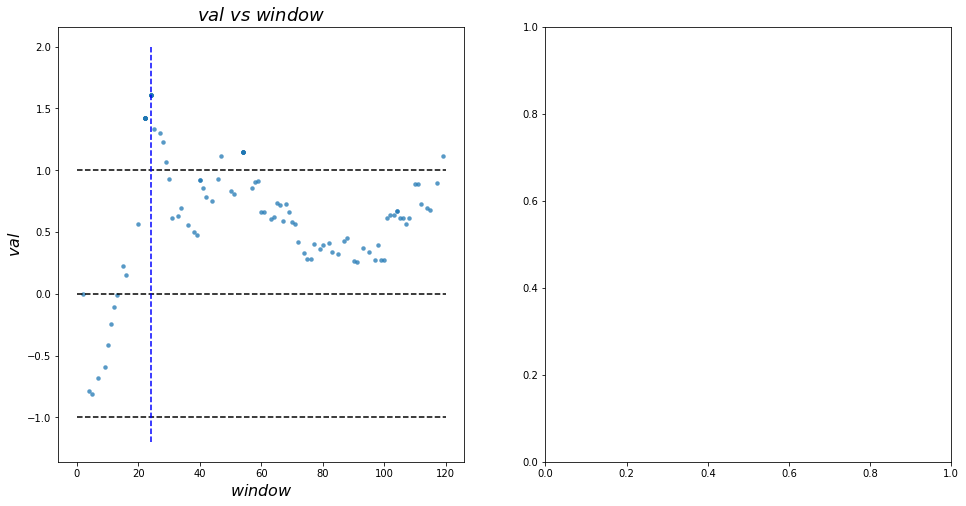

In [21]:
f, ax = plt.subplots(1,2, figsize = (16, 8))
xs = [t['misc']['vals']['window'] for t in trials.trials]
ys = [-1 * t['result']['loss'] for t in trials.trials]
ax[0].scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax[0].set_title('$val$ $vs$ $window$ ', fontsize=18)
ax[0].set_xlabel('$window$', fontsize=16)
ax[0].set_ylabel('$val$', fontsize=16)
ax[0].hlines(0, 0, 120, color='black',linestyle="--")
ax[0].hlines(-1, 0, 120, color='black',linestyle="--")
ax[0].hlines(1, 0, 120, color='black',linestyle="--")
ax[0].vlines(best['window'], -1.2, 2, color='blue',linestyle="--")